# Exercice 1
### R√©gression lin√©aire
___

Supposons que nous avons des donn√©es de pairs de nombres r√©els $\mathbf X=(x_1,\ldots,x_n)\in \mathbb R^n$ et $\mathbf y = (y_1,\ldots,y_n)\in \mathbb R^n$. Supposons que $\mathbf X,\mathbf y$ satisfont $y_i = a x_i+b$ pour quelque $a,b\in \mathbb R$. Nous voulons trouver les valeurs de $a,b$. 

On peut √©crire le condition $y_i=a x_i+b$ comme une √©quation lin√©aire
$$
    \mathbf y = a \mathbf X+b =  (\mathbf X\,\,\mathbf 1)\cdot \begin{pmatrix}a\\b\end{pmatrix},
$$
o√π $\mathbf 1 = (1,\ldots,1)$ est un vecteur de m√™me taille que $\mathbf X$, et donc $(\mathbf X\,\,\mathbf 1)$ est une matrice de taille $n\times 2$. On peut donc obtenir $a,b$ en r√©solvant l'√©quation lin√©aire. 

Remarquons que l'√©quation lin√©aire est surd√©termin√©e, et en pratique il y a du bruit al√©atoire aussi (c'est-√†-dire, $y_i=a x_i+b+\epsilon_i$ avec $\epsilon_i$ une variable al√©atoire √† petites valeurs). Donc g√©n√©ralement ce n'est pas possible de r√©soudre exactement, mais on peut trouver des $a,b$ qui minimisent
$$
    \|a \mathbf X+b-\mathbf y\| = \left\| (\mathbf X\,\,\mathbf 1)\cdot \begin{pmatrix}a\\b\end{pmatrix}-\mathbf y \right\|
$$


### Exercice 1 a) 
___

On va √©crire une classe Python `LinearRegression` pour faire de la r√©gression lin√©aire. On peut utiliser `np.linalg.lstsq` pour r√©soudre num√©riquement des √©quations lin√©aires $\mathbf A \mathbf x=\mathbf b$.

> √âcrire la m√©thode `fit` de `LinearRegression` qui calcule les meilleures valeurs de $a,b$.


### Exercice 1 b)
___
Une mesure important de qualit√© de r√©gression lin√©aire est le coefficient de corr√©lation $\rho_{\mathbf X, \mathbf y}$. Vous avez vu la d√©finition dans le cours. Si $|\rho_{\mathbf X, \mathbf y}|$ est proche de 1, nous pouvons bien modeler la r√©lation entre $X$ et $y$ par une fonction lin√©aire, est si $|\rho_{\mathbf X, \mathbf y}|$ est proche de 0, un mod√®le lin√©air n'est pas valide.
> √âcrivez la m√©thode `correlation_coefficient` qui calcule le coefficient de corr√©lation. Vous pouvez utiliser `np.mean` pour calculer la moyenne des donn√©es, et `np.std` pour calculer l'√©cart-type.

In [561]:
# Initialisation
# √âvaluez cette cellule √† le debut de chaque session
# Assurez-vous que cette cellule ne donne pas des erreurs

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [567]:

class LinearRegression:
    def __init__(self, X, y):
        """Initialisation de classe"""
        
        self.a, self.b = self.fit(X,y)
        
    def fit(self, X, y):
        """Calculer les meilleures valeurs de a,b.
        Donne un tuple (a,b)."""
        
        self.X=X
        self.y=y
        
        # La matrice (X 1)
        X_augmented = np.vstack([X, np.ones_like(X)]).transpose()
        
        # Calculer la solution du probl√®me lin√©aire
        
        #------------------------
        # VOTRE CODE
        #on calcule les meilleurs valeurs de a et b gr√¢ce √† np.linalg.lstsq
        a, b = np.linalg.lstsq(X_augmented, y, rcond=None)[0]
        return a,b
        #------------------------
        
        
        pass
    
    def predict(self, X):
        """Calculer aX+b"""
        return self.a*X+self.b
    
    def correlation_coefficient(self):
        """Calculer le coefficient de corr√©lation.
        Donne un nombre entre -1 et 1."""
        
        #------------------------
        # VOTRE CODE
        #on calcule la cov(x,y)
        xycovar = np.mean(self.X*self.y)-np.mean(self.X)*np.mean(self.y)
        #xycovar = np.mean((self.X-np.mean(self.X))*(self.y-np.mean(self.y)))
        #on calcule sigma pour x et y
        sigma1 = np.std(self.X)
        sigma2 = np.std(self.y)
        #on calcule le coeff de corr√©lation : cov(x,y)/(sigmaX*sigmay)
        coeff_corr = xycovar/(sigma1*sigma2)
        return coeff_corr
        #------------------------
        
        pass
    
    def plot(self):
        """Tracer les donn√©es X,y et sa r√©gression lin√©aire"""
        fit_X = np.linspace(min(self.X),max(self.X),num=10)
        fit_y = self.predict(fit_X)
        
        plt.ylabel('y')
        plt.xlabel('X')
        
        plt.plot(self.X,self.y,'.')
        plt.plot(fit_X,fit_y,'r')
    

### Donn√©es lin√©aire

Nous pouvons tester la classe avec quelques donn√©es synth√©tiques.

D'abord nous prenons la r√©lation $y =1+2X+\mathcal N(0,0.1)$, o√π $\mathcal N(\mu,\sigma)$ est une variable al√©atoire de loi normale avec esp√©rance $\mu$ et √©cart-type $\sigma$. Id√©alement nous voulons trouver que $a=2, b=1$ et un coefficient de corr√©lation $\rho=1$.

Nous trouvons que a=1.9996, b=0.9994.
Le coefficient de corr√©lation est : rho = 0.9967


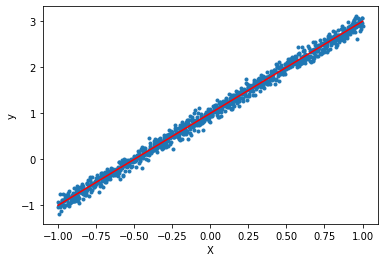

In [585]:
data_x = np.linspace(-1,1,1000)
data_y = 1+data_x*2+0.1*np.random.normal(size=len(data_x))

reg = LinearRegression(data_x, data_y)

print("Nous trouvons que a=%.4f, b=%.4f." % (reg.a,reg.b))

reg.plot()

rho = reg.correlation_coefficient()
print("Le coefficient de corr√©lation est : rho = %.4f" % rho)

Notons que si $a$ est n√©gatif, le coefficient de corr√©lation est aussi n√©gatif. Par exemple nous consid√©rons $y = -X +\mathcal N(0,0.1)$.

Nous trouvons que a=-0.9973, b=-0.0020.
Le coefficient de corr√©lation est : rho = -0.9856


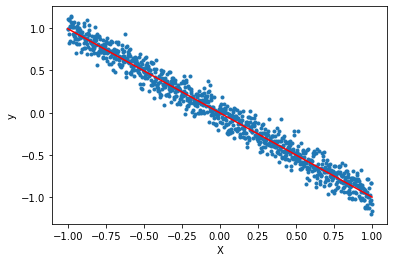

In [569]:
data_x = np.linspace(-1,1,1000)
data_y = -data_x+0.1*np.random.normal(size=len(data_x))

reg = LinearRegression(data_x, data_y)

print("Nous trouvons que a=%.4f, b=%.4f." % (reg.a,reg.b))

reg.plot()

rho = reg.correlation_coefficient()
print("Le coefficient de corr√©lation est : rho = %.4f" % rho)

### Donn√©es non lin√©aires

Quand la relation entre $y$ et $X$ n'est pas lin√©aire, on voit que la ligne n'est pas toujours proche des donn√©es, et on voit que le coefficient de corr√©lation n'est pas proche de $\pm 1$. Par exemple, ici nous prenons $y = (X+1)^2+\mathcal N(0,0.1)$.

Le coefficient de corr√©lation est : rho = 0.8881


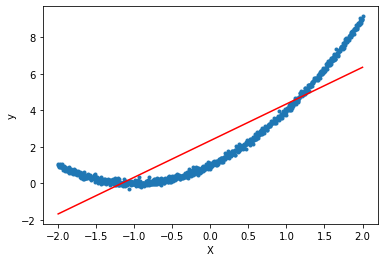

In [570]:
data_x = np.linspace(-2,2,1000)
data_y = (data_x+1)**2+0.1*np.random.normal(size=len(data_x))

reg = LinearRegression(data_x, data_y)

reg.plot()
rho = reg.correlation_coefficient()
print("Le coefficient de corr√©lation est : rho = %.4f" % rho)

Nous pouvons consid√©rer des relations plus compliqu√©es aussi. Par exemple consid√©rons $y=\sin(X)+\mathcal N(0,0.1)$.

Le coefficient de corr√©lation est : rho = 0.7740


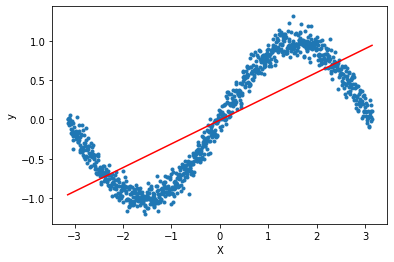

In [571]:
data_x = np.linspace(-np.pi,np.pi,1000)
data_y = np.sin(data_x)+0.1*np.random.normal(size=len(data_x))

reg = LinearRegression(data_x, data_y)

reg.plot()
rho = reg.correlation_coefficient()
print("Le coefficient de corr√©lation est : rho = %.4f" % rho)

# Exercice 2
### L'algorithme du gradient
___

Nous avons vu que la r√©gression lin√©aire ne donne pas un bon mod√®le dans tous les cas. Par cons√©quent nous devons utiliser de la r√©gression non lin√©aire. Supposons que nous avons des variables al√©atoires $X,y$ √† valeurs r√©els avec relation
$$ y = f(X)+\mathcal N(0,\sigma).$$
o√π $\mathcal N(0,\sigma)$ d√©note une loi normale d'esp√©rance $0$ et √©cart-type $\sigma$, et $f$ et une fonction diff√©rentiable.

√âtant donn√© un √©chantillon $(x_1,\dots,x_n)$ et $(y_1,\dots y_n)$ de ses variables al√©atoires, la t√¢che est de d√©terminer $f$. Pour r√©soudre ce probl√®me nous devons supposer que $f=\theta_{\mathbf a}$ o√π $\theta_{\mathbf a}\colon \mathbb R\to\mathbb R$ est une fonction d√©pendante de param√®tres $\mathbf a = (a_1,\dots,a_k)\in \mathbb R^k$, de plus $\theta_{\mathbf a}$ est diff√©rentiable par rapport √† tous les param√®tres $a_i$. Dans ce cas, nous pouvons trouver les meilleures valeurs des param√®tres $a_i$ en minimisant la fonction objectif
$$
    L(a_1,\ldots,a_k)=\frac1n\sum_{i=1}^n(\theta_{a_1,\ldots,a_k}(x_i)-y_i)^2.
$$

En g√©neral c'est impossible de trouver une formule exacte pour le minimum de $L$, et on doit utiliser des m√©thodes num√©riques. Une m√©thode tr√®s g√©nerale est l'algorithme du gradient. Rappelons que le gradient $$\nabla f(x_1,\ldots,x_n) = \left(\frac{\partial}{\partial x_1}f(x_1,\dots,x_n),\dots, \frac{\partial}{\partial x_n}f(x_1,\dots,x_n)\right)$$ d'une fonction $f\colon\mathbb R^k\to \mathbb R$ est toujours perpendiculaire aux ensembles de niveau et donc en direction du maximum de la fonction. L'algorithme du gradient proc√®de comme suit :

> __Algorithme du gradient__ <br/>
Fixer un taux d'apprentissage $\gamma>0$, une tol√©rance $\varepsilon>0$, et un nombre maxmimum d'it√©rations $N$.
- Initialiser avec param√®tres $\mathbf x_0 \in \mathbb R^k$
- It√©rer sur $1\leq n\leq N$ :
    - Calculer $\mathbf x_n = \mathbf x_{n-1}-\gamma \nabla f(\mathbf x_{n-1})$
    - Arr√™ter si $\|x_n-x_{n-1}\|\leq \varepsilon$.
    
D'abord on va impl√©menter cet algorithme et l'utiliser pour trouver le minimum de certaines fonctions simples.

### Exercice 2 a)
> Compl√©tez le code de la classe `GradientDescent` ci-dessous qui impl√©mente l'algorithme du gradient

In [574]:
class GradientDescent:
    def __init__(self, df, params, gamma=0.01):
        """Minimiser la fonction f par l'algorithme du gradient
        
        Param√®tres
        -----
        df : gradient de la fonction f
        params : param√®tres initiales
        gamma : taux d'apprentissage"""
        
        self.df = df
        self.gamma = gamma
        self.params = np.array(params) # Convertir en un array de numpy 
    def step(self):
        """Faire une √©tape d'algorithme"""
        #on d√©finit x comme f(x) de la d√©riv√©e de f(x) 
        x = self.df(self.params)
        #on calcul l'√©tape : ùê±ùëõ=ùê±ùëõ‚àí1‚àíùõæ‚àáùëì(ùê±ùëõ‚àí1)
        self.params = self.params - self.gamma*x# VOTRE CODE
        #return xn
        return self.params
    def minimize(self, precision=1e-9, max_iters=1000):
        """Faire tous les √©tapes d'algorithme"""
        
        for element in range(max_iters):
            #params_old = xn-1
            params_old = self.params
            #appelle xn
            self.step()
            # Arr√™ter si la difference est moins de tol√©rance
            
            # VOTRE CODE
            #on arrete si notre approximation est suffisament bonne : ‚Äñùë•ùëõ‚àíùë•ùëõ‚àí1‚Äñ‚â§ùúÄ
            if np.linalg.norm(self.params - params_old) <= precision:
                break  
        #return x minimum
        return self.params
        

Essayons d'utiliser la classe ci-dessus pour minimiser la fonction $x^2+2x+1$. Sa d√©riv√© est √©gale √† $2x+2$. On voit que l'algorithme a bien trouv√© le minimum $x=-1$.

In [575]:
def df(x):
    return 2*x[0]+2  # Notons que x est toujours une liste
gd = GradientDescent(df, [0])
gd.minimize()

array([-0.99999995])

Nous pouvons aussi utiliser plusieurs variables. Par exemple, prenons $f(x,y,z) = (x+1)^2+(y-2)^2+(z-1)^4$ avec gradient $(2x+2,2y-4,4z^3-4)$ et minimum ($-1,2,1)$.

In [576]:
def df(x):
    return np.array([2+2*x[0], 2*x[1]-4, 4*x[2]**3-4])
gd = GradientDescent(df,[0,0,0])
gd.minimize()

array([-0.99999998,  1.99999996,  1.        ])

Si la fonction n'a pas de minimum l'algorithme ne marche pas. Par exemple, prenons $f(x)=x^3+x$, avec gradient $f'(x) = 3x^2+1$

In [577]:
def df(x):
    return np.array([3*x[0]**2+1])
gd = GradientDescent(df, [0])
gd.minimize()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in subtract


array([-inf])

### Exercice 2 b)
> Utilisez l'algorithme du gradient pour calculer le minimum de $\sin(x)$ avec valeur initiale $x_0=0$. Comparez la valeur obtenue √† $-\pi/2$.

In [578]:
def df(x):
    return np.array([np.cos(x[0])])# VOTRE CODE
    #on obtient la valeur minimum -1.57079628, c'est approximativement √©gal √† ‚àíùúã/2 = -1.57079632
    pass

gd = GradientDescent(df,[0])
gd.minimize()

array([-1.57070968])

## Exercice 3
### R√©gression non lin√©aire
___

Nous allons appliquer l'algorithme du gradient √† la r√©gression non lin√©aire. Rappelons que $\theta_{\mathbf a}$ est diff√©rentiable par rapport √† tous les param√®tres $a_i$, et que nous voulons minimiser la fonction objectif 
$$
    L(a_1,\ldots,a_k)=\frac1n\sum_{i=1}^n(\theta_{\mathbf a}(x_i)-y_i)^2
$$
Nous calculons le gradient :
$$
    \nabla L(a_1,\ldots,a_k) = \frac1n\sum_{i=1}^n2(\theta_{\mathbf a}(x_i)-y_i)\nabla \theta_{\mathbf a}(x_i)
$$
Donc pour appliquer l'algorithme du gradient, nous devons √† chaque √©tape calculer $\theta_{\mathbf a}(x_i)$ et $\nabla\theta_{\mathbf a}(x_i)$ pour chaque $x_i$.

### Exercice 3 a)
> Compl√©tez le code de la classe `NonLinearRegression` ci-dessous qui impl√©mente la r√©gression non lin√©aire

In [579]:
class NonLinearRegression:
    def __init__(self, X, y, theta, dtheta, params, gamma=0.01, precision=1e-5, max_iters=1000):
        """
        Une classe pour r√©gression non lin√©aire.
        
        Param√®tres:
        -------
        X : tableau des √©chantillons de variable al√©atoire X
        y : tableau des √©chantillons de variable al√©atoire y
        theta : fonction param√©trique de la forme theta(params, X)
        dtheta : gradient du theta, fonction de la forme dtheta(params, X)
        params : param√®tres initiale de theta
        gamma : taux d'apprentissage d'algorithme du gradient
        precision : tol√©rance d'algorithme du gradient
        max_iters : nombre maximal des √©tapes d'algorithme du gradient
        """
        
        # Conserver tous les param√®tres dans la classe
        self.X = X
        self.y = y
        self.theta = theta
        self.dtheta = dtheta
        self.params = np.array(params)
        self.gamma = gamma
        self.precision=precision
        self.max_iters = max_iters
        
    def predict(self,X):
        """Utiliser les param√®tres actuels pour fair une pr√©diction theta(X)"""
        
        return np.array([self.theta(self.params,x) for x in X])
        
    def loss(self):
        """Calculer la fonction objectif avec param√®tres actuels"""
        
        predictions = self.predict(self.X)
        square_difference = (predictions-self.y)**2
        loss = np.mean(square_difference)/len(self.X)
        return loss
    
    def loss_gradient(self):
        """Calculer le gradient de la fonction objectif
        Donne un nombre."""
        
        predictions = self.predict(self.X)
        gradients = np.array([self.dtheta(self.params,x) for x in self.X])
        
        # Votre code pour grad_loss
        # Utilisez `predictions` et `gradients`
        # N'oubliez pas de diviser par len(self.X).
        #on calcule : (1/ùëõ)‚àë((ùëñ=1)->ùëõ) 2*(ùúÉùêö(ùë•ùëñ)‚àíùë¶ùëñ)‚àáùúÉùêö(ùë•ùëñ)
        grad_loss = np.dot((predictions-self.y)*2,(gradients))/len(self.X)
        # Normaliser et couper les gradients pour raisons de convergence
        grad_loss = np.clip(grad_loss,-1,1)
        
        return grad_loss

    def define_gradient(self):
        """Definer une fonction du gradient de la fonction objectif en 
        utilisant l'algorithme du gradient"""
        
        def grad(params):
            self.params = np.array(params)
            return self.loss_gradient()
        
        return grad
    
    def fit(self):
        """Calculer parem√®tres optimal par l'algorithme du gradient"""
        
        grad = self.define_gradient()
        gd = GradientDescent(grad,self.params,gamma=self.gamma)
        gd.minimize(precision=self.precision, max_iters=self.max_iters)
        return self.params
    
    def plot(self, num_points=100):
        """Tracer les donn√©es avec les pr√©dictions dans un seul graphique"""
        
        # faire les pr√©dictions
        fit_X = np.linspace(min(self.X),max(self.X),num=num_points)
        fit_y = self.predict(fit_X)
        
        # tracer les donn√©es
        plt.plot(self.X,self.y,'.')
        
        # tracer les pr√©dictions
        plt.plot(fit_X,fit_y,'r')
        
        plt.ylabel('y')
        plt.xlabel('X')

### Mod√®le lin√©aire

D'abord nous allons appliquer l'algorithme de la r√©gression non lin√©aire √† un mod√®le lin√©aire. Le mod√®le est donn√©e par
$$
    \theta_{a,b}(x) = ax +b,\qquad \nabla \theta_{a,b}(x) = (x,1)
$$
On voit que ceci trouve des bons param√®tres $a,b$, mais cela prend plus de temps que l'algorithme de la r√©gression lin√©aire.

On trouve des param√®tres a=1.9959, b=1.0064


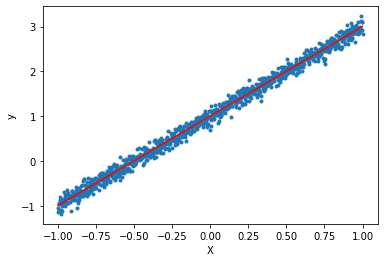

In [581]:
def theta(params,x):
    return params[0]*x+params[1]

def dtheta(params,x):
    return np.array([x,1])

data_x = np.linspace(-1,1,1000)
data_y = 1+data_x*2+0.1*np.random.normal(size=len(data_x))

nlr = NonLinearRegression(data_x, data_y, theta, dtheta, [0,0])
nlr.fit()
nlr.plot()
print("On trouve des param√®tres a=%.4f, b=%.4f" % tuple(nlr.params))

### Mod√®le parabolique
Puis nous prenons des donn√©es paraboliques. On va utiliser le mod√®le
$$
    \theta_{a,b,c}(x) = ax^2+bx+c,\qquad \nabla\theta_{a,b,c}(x) = (x^2,x,1)
$$
On voit que l'algrotihme √† bien trouv√© les param√®tres proche de (1,2,1).

On trouve des param√®tres a=1.0011, b=1.9995, c=1.0007


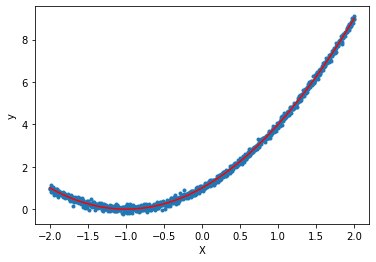

In [582]:
def theta(params,x):
    return params[0]*(x**2)+params[1]*x+params[2]

def dtheta(params,x):
    return np.array([x**2,x,1])

data_x = np.linspace(-2,2,1000)
data_y = (data_x+1)**2+0.1*np.random.normal(size=len(data_x))

nlr = NonLinearRegression(data_x, data_y, theta, dtheta, [0,0,0])
nlr.fit()
nlr.plot()
print("On trouve des param√®tres a=%.4f, b=%.4f, c=%.4f" % tuple(nlr.params))

### Mod√®le sinuso√Ødal
Consid√©rons le mod√®le
$$
    \theta_{a,b,c,d}(x) = c\sin(ax+b)+d,\qquad \nabla\theta_{a,b,c,d}(x)=(cx\cos(ax+b),c\cos(ax+b),\sin(ax+b),1)
$$
M√™me pour les mod√®les plus compliqu√©s on voit que l'algorithme trouve les bon param√®tres.

On trouve des param√®tres a=1.0005, b=-0.0021, c=0.9980, d=0.0046


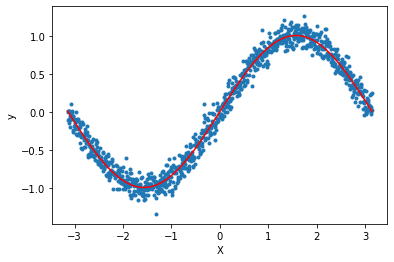

In [583]:
def theta(params,x):
    return params[2]*np.sin(x*params[0]+params[1])+params[3]

def dtheta(params,x):
    return np.array([params[2]*x*np.cos(x*params[0]+params[1]),
                    params[2]*np.cos(x*params[0]+params[1]),
                    np.sin(x*params[0]+params[1]),
                    1])

data_x = np.linspace(-np.pi,np.pi,1000)
data_y = np.sin(data_x)+0.1*np.random.normal(size=len(data_x))

nlr = NonLinearRegression(data_x, data_y, theta, dtheta, [1,1,1,0])
nlr.fit()
nlr.plot()
print("On trouve des param√®tres a=%.4f, b=%.4f, c=%.4f, d=%.4f" % tuple(nlr.params))

## Exercice 3b)
> √âcrivez le code pour `theta` et `dtheta` ci-dessous pour un mod√®le de la forme $\theta_{a,b,c,d}=a+bx+cx^2+dx^3+ex^4$ et faites de la r√©gression non lin√©aire. Comparez les resultats √† l'expansion de Taylor de $\sin(x)$.

On trouve des param√®tres a=0.0013, b=0.9447, c=-0.0010, d=-0.1255, e=0.0000


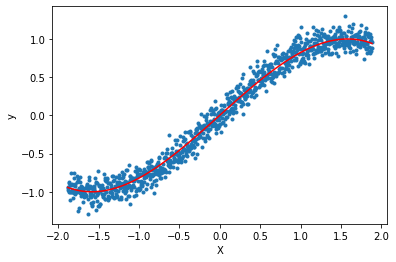

In [584]:
def theta(params,x):
    return params[0]+params[1]*x+params[2]*(x**2)+params[3]*(x**3)+params[4]*(x**4)

def dtheta(params,x):
    return np.array([1,x,x**2,x**3,x**4])


data_x = np.linspace(-np.pi*0.6,np.pi*0.6,1000)
data_y = np.sin(data_x)+0.1*np.random.normal(size=len(data_x))

nlr = NonLinearRegression(data_x, data_y, theta, dtheta, [0,0,0,0,0])
nlr.fit()
nlr.plot()
print("On trouve des param√®tres a=%.4f, b=%.4f, c=%.4f, d=%.4f, e=%.4f" % tuple(nlr.params))